In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [6]:
df = pd.read_csv("flights.csv")
df1 = pd.read_csv("airports.csv")
df2 = pd.read_csv("airlines.csv")
df3 = pd.read_csv("cancellation_codes.csv")

C:\Users\Shree\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
print(df.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)

(5819079, 31)
(322, 7)
(14, 2)
(4, 2)


In [4]:
df1.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [7]:
df.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()  # for an insight into the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [9]:
df.value_counts('DIVERTED')  # will tell us the no. of flights which were diverted


DIVERTED
0    5803892
1      15187
dtype: int64

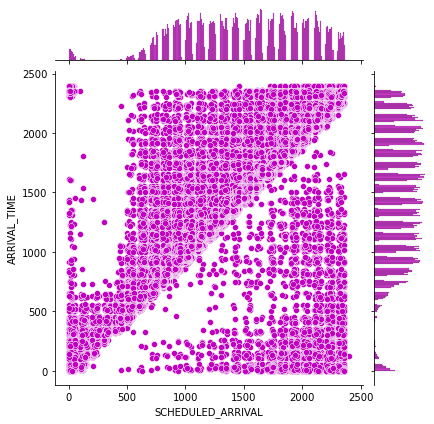

In [11]:
#1.Plot the scheduled arrival and arrival time
sns.jointplot(data=df, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME",color='m')
plt.show()

<AxesSubplot:>

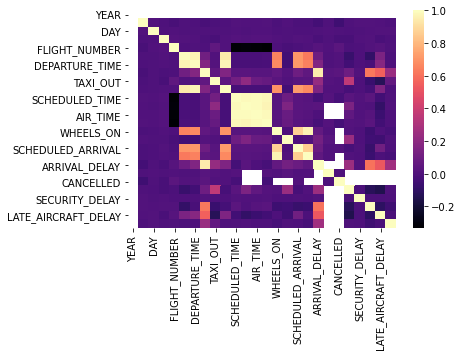

In [12]:
#2.	Show the important features 
corr = df.corr(method='pearson')
sns.heatmap(corr,cmap='magma')

<AxesSubplot:title={'center':'Heat Map'}>

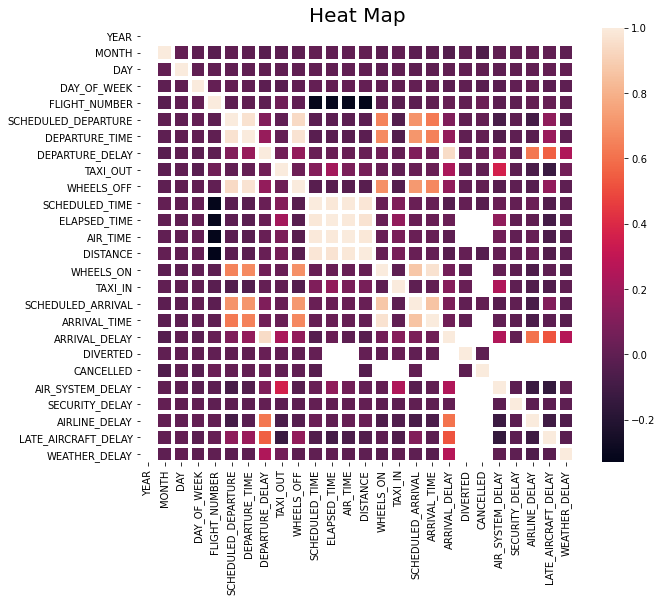

In [13]:
plt.figure(figsize=(10,8))
plt.title('Heat Map', fontsize=20)
sns.heatmap(df.corr(), cbar=True, annot =False, square=True, fmt='.2f',annot_kws={'size':15}, linewidth=3)

Text(0, 0.5, 'Number of flights')

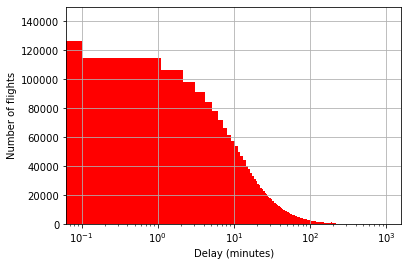

In [14]:
#3Distribution of the arrival delay attribute
fig, ax = plt.subplots()
df.ARRIVAL_DELAY.hist(ax=ax, bins=1000, range=(-10, 1000),color="r")
ax.set_xscale('log')
plt.ylim(0, 150000)
plt.xlabel('Delay (minutes)')
plt.ylabel('Number of flights')

<AxesSubplot:xlabel='ARRIVAL_DELAY', ylabel='AIRLINE'>

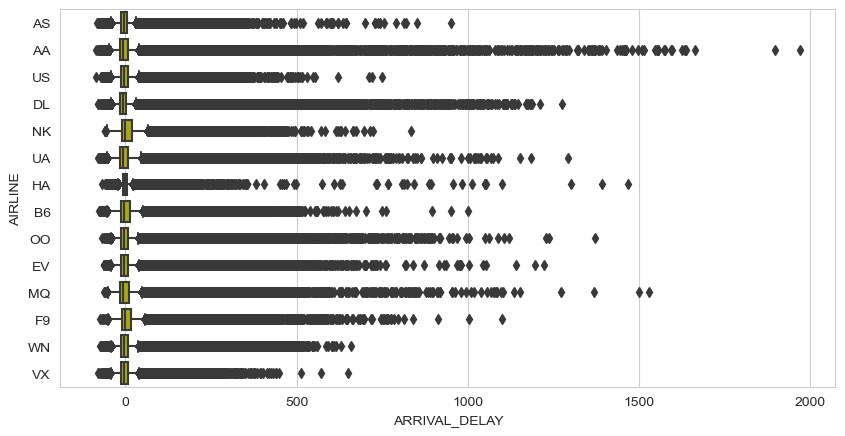

In [15]:
#4plot the arrival delay
plt.figure(figsize=(10,5),dpi=100  )
sns.set_style("whitegrid") 
sns.boxplot(x = 'ARRIVAL_DELAY', y = 'AIRLINE', data = df , color = 'y') 

<AxesSubplot:xlabel='AIRLINE', ylabel='DEPARTURE_DELAY'>

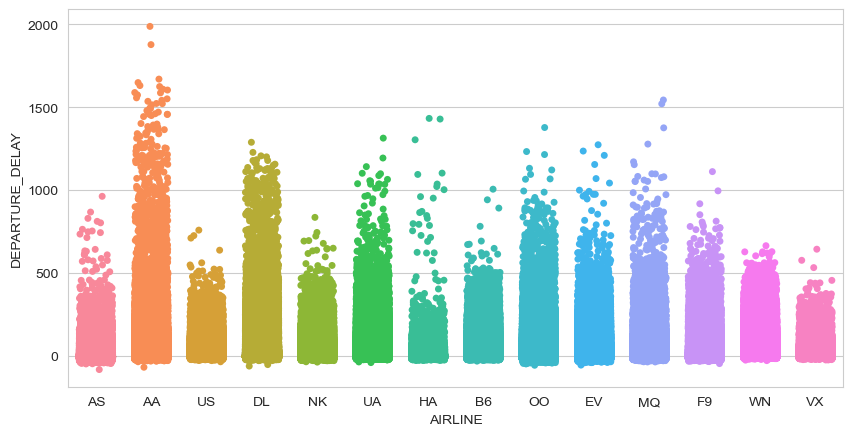

In [16]:
#5.departure delay with airline
plt.figure(figsize=(10,5),dpi=100  )
sns.set_style("whitegrid") 
sns.stripplot(x = 'AIRLINE', y = 'DEPARTURE_DELAY', data = df,jitter=0.30,orient="v") 

In [16]:
#6How many unique origin airports?
n_orig_arp=len(df.ORIGIN_AIRPORT.unique())
#How many unique destination airports?
n_dest_arp=len(df.DESTINATION_AIRPORT.unique())
print("Origin Airports: ", n_orig_arp)
print("Destination Airports: ", n_dest_arp)


Origin Airports:  930
Destination Airports:  930


In [ ]:
a=df.SCHEDULED_DEPARTURE


In [17]:
#How many flights that have a scheduled departure time later than 18h00?
n_night_flight=len(df.SCHEDULED_DEPARTURE[df.SCHEDULED_DEPARTURE>1800])
print("Night Flights: ", n_night_flight)
print("Night Flights over Total: ", (n_night_flight/len(df))*100, "%")

Night Flights:  1248017
Night Flights over Total:  21.446984995391883 %


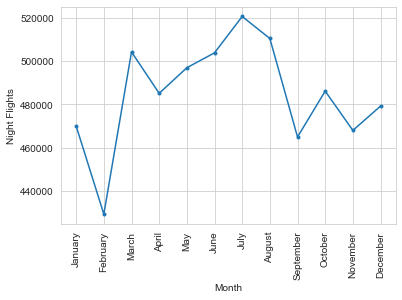

In [18]:
#6 How many flights in each month of the year?
import datetime as dt

months = []
for month in range(1, 13):
    months.append(dt.datetime(year=1994, month=month, day=1).strftime("%B"))

fl_per_month = list(df.groupby('MONTH').count().YEAR
)
plt.xlabel('Month')
plt.ylabel('Night Flights')
plt.xticks(range(1,13), months, rotation='vertical')
plt.plot(range(1,13), np.array(fl_per_month), '.-')
plt.show()

In [19]:
flights_dayofweek = (df.groupby(df.DAY_OF_WEEK).count()).YEAR

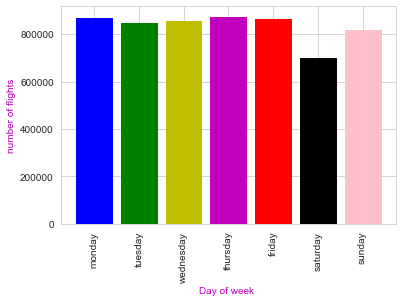

In [20]:
#7.RELATIONSHIP BETWEEN NUMBER OF  FLIGHTS AND DAYS OF THE WEEK
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#Global aggregates
days=['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
n_flight_week=list(df.groupby('DAY_OF_WEEK').count().YEAR)
frequencies=[n_flight_week[i] for i in range(len(n_flight_week)) ]
a=plt.bar(range(0,7),frequencies)
a[0].set_color('b')
a[1].set_color('g')
a[2].set_color('y')
a[3].set_color('m')
a[4].set_color('r')
a[5].set_color('black')
a[6].set_color('pink')
plt.xlabel('Day of week ',color='m')
plt.ylabel('number of flights',color='m')
plt.xticks(range(0,7),days,rotation='vertical')
plt.show()


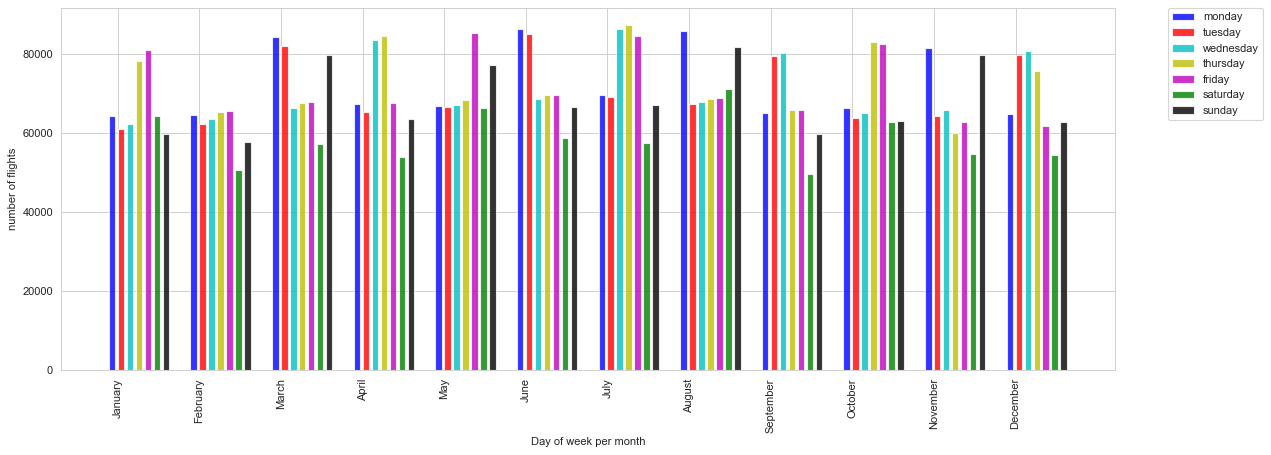

<Figure size 1224x360 with 0 Axes>

In [21]:
#8.Number of flights per day of the week for each month
figure(num=None, figsize=(17, 6), dpi=80, facecolor='w', edgecolor='k');


n_flight_day_month=list(df.groupby(['MONTH', 'DAY_OF_WEEK']).count().YEAR)
frequencies=[]
frequency=[]
for i in range(1,len(n_flight_day_month)+1):
    
    frequency.append(n_flight_day_month[i-1])
    if (i%7==0):
        frequencies.append(frequency)
        frequency=[]


# data to plot
n_groups = 12


colors = ['b',  'r', 'c',  'y', 'm','g','k']
# create plot
index = np.arange(0, n_groups * 5, 5)
bar_width = 0.55
opacity = 0.8

for i in range(7):
    plt.bar(index+bar_width*i,tuple([row[i] for row in frequencies]),align='edge',width=0.4,
    alpha=opacity,
    color=colors[i],
    label=days[i])

plt.xlabel('Day of week per month')
plt.ylabel('number of flights')
plt.xticks(index + bar_width, ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'),rotation='vertical')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(17,5));
plt.show();

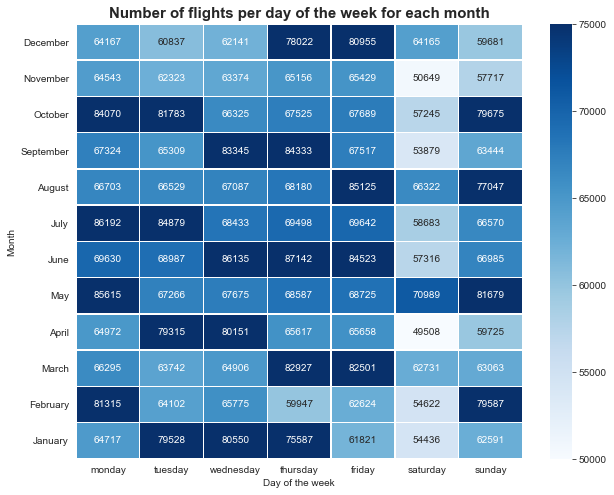

In [23]:
# use a heatmap to better visualize the data
pddf=pd.DataFrame({'count' : df.groupby( ['MONTH', 'DAY_OF_WEEK'] ).size()}).reset_index()
pddf = pddf.pivot("MONTH", "DAY_OF_WEEK", "count")
fig, ax=plt.subplots(figsize=(10,8))
ax = sns.heatmap(pddf, 
                  linewidths=.5,
                  annot=True,
                  vmin=50000,
                  vmax=75000,
                  fmt='d',
                  cmap='Blues', ax=ax)
# set plot's labels
ax.set_xticklabels(days)
ax.set_yticklabels(list(reversed(months)), rotation=0)
ax.set(xlabel='Day of the week', ylabel='Month')
ax.set_title("Number of flights per day of the week for each month", fontweight="bold", size=15)

plt.show()

[]

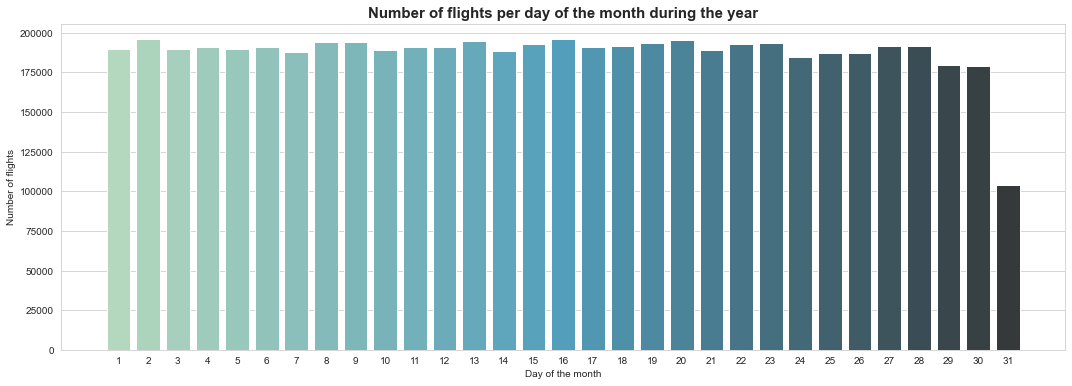

In [24]:
# number of flights per day of the month during the year
# create the pandas dataframe
pddf=pd.DataFrame({'count' : df.groupby(df.DAY).size()}).reset_index()

# plot the number of flights per day of the month
f, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x="DAY",
            y="count",
            data=pddf,
            palette=sns.color_palette("GnBu_d", 31),
            ax=ax)

# set plot's labels
ax.set(xlabel='Day of the month', ylabel='Number of flights')
ax.set_title("Number of flights per day of the month during the year", fontweight="bold", size=15)

plt.plot()

[]

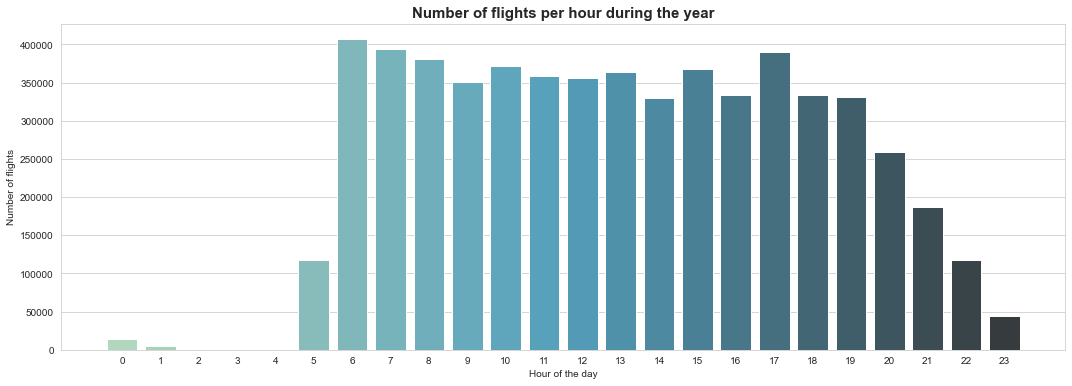

In [25]:
# number of flights per hour during the year

pddf=pd.DataFrame({'count' : df.groupby(((df.SCHEDULED_DEPARTURE/100).astype(int))).size()}).reset_index()

# plot the number of flights per hour
f, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x="SCHEDULED_DEPARTURE",
            y="count",
            data=pddf,
            palette=sns.color_palette("GnBu_d", 24),
            ax=ax)

# set plot's labels
ax.set(xlabel='Hour of the day', ylabel='Number of flights')
ax.set_title("Number of flights per hour during the year", fontweight="bold", size=15)

plt.plot()

In [26]:
df['HOUR']=(df.SCHEDULED_DEPARTURE/100).astype(int)

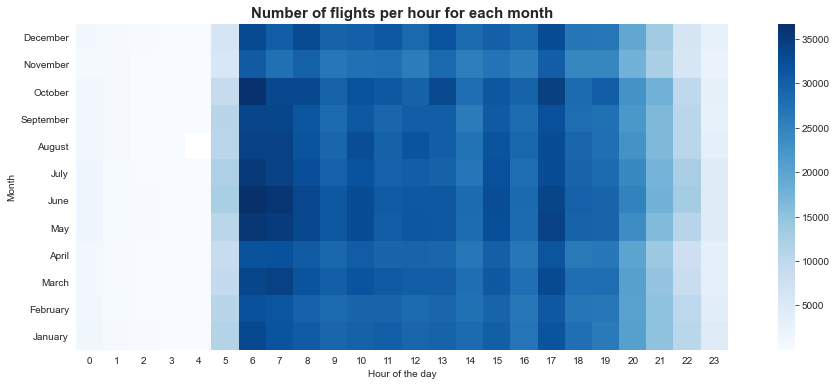

In [30]:
# number of flights per hour per month

pddf=pd.DataFrame({'count' : df.groupby(['MONTH','HOUR']).size()}).reset_index()

# use a heatmap to better visualize the data
pddf = pddf.pivot("MONTH", "HOUR", "count")
f, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pddf,
            square=True,
            cmap='Blues')

# set plot's labels
ax.set_yticklabels(list(reversed(months)), rotation=0)
ax.set(xlabel='Hour of the day', ylabel='Month')
ax.set_title("Number of flights per hour for each month", fontweight="bold", size=15)

plt.show() 